# kNN Classifier - Breast Cancer dataset.

In [1]:
reset -fs

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import pandas as pd
import mglearn
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
cancer_data = load_breast_cancer()

In [4]:
print(cancer_data.DESCR)

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [5]:
# Features.
print(cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [6]:
# Labels. Target variable.
print(cancer_data.target_names)

['malignant' 'benign']


In [7]:
# What is the data type?
type(cancer_data.data)

numpy.ndarray

In [8]:
# How many rows and columns?
cancer_data.data.shape

(569, 30)

### Plotting with `mglearn`.

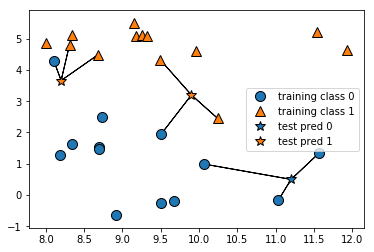

In [9]:
# With 3 neighbors.
mglearn.plots.plot_knn_classification(n_neighbors=3)

Triangle (class 1), is benign tumor. Circle (class 0) is malignant tumor.

Stars are tissue samples predicted class: 1 is benign tumor, 0 is malignant tumor.

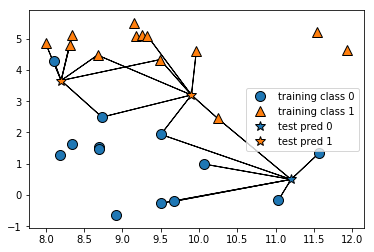

In [10]:
# With 7 neighbors.
mglearn.plots.plot_knn_classification(n_neighbors=7)

In [11]:
# Fitting the data with a model.
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, stratify=cancer_data.target, random_state = 42)

In [12]:
knn = KNeighborsClassifier()

In [13]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [14]:
print("Accuracy on kNN | n = 5 | training set: {:.2%}".format(knn.score(X_train, y_train)))

Accuracy on kNN | n = 5 | training set: 94.60%


In [15]:
print("Accuracy on kNN | n = 5 | testing set: {:.2%}".format(knn.score(X_test, y_test)))

Accuracy on kNN | n = 5 | testing set: 93.01%


Let's plot the accuracy for a range of neighbors.

In [16]:
training_accuracy = []
testing_accuracy = []

In [17]:
neighbors_settings = range(1,11)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(cancer_data.data, cancer_data.target, stratify=cancer_data.target, random_state = 66)

In [19]:
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))

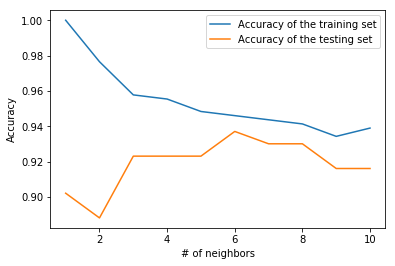

In [20]:
plt.plot(neighbors_settings, training_accuracy, label="Accuracy of the training set")
plt.plot(neighbors_settings, testing_accuracy, label="Accuracy of the testing set")
plt.ylabel("Accuracy")
plt.xlabel("# of neighbors")
plt.legend();

Testing set is more accurate with 6 neighbors.

## Loading data with pandas.

In [21]:
breast_cancer = pd.read_csv("../Data/breast-cancer-wisconsin-data.csv", header=None)

In [22]:
breast_cancer.head()

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Since we don't have column names in our pandas dataframe, we will use the ones from the `sklearn` dataset above, but let's check if the number of features and labels is the same:

In [23]:
len(cancer_data.feature_names), len(breast_cancer.columns)

(30, 32)

We can see that they are different because the pandas dataframe has a column with an `ID`, the first column, and another column, the second one, which is our target variable (`M` for malignant, `B` for benign).

In [24]:
breast_cancer_labels = cancer_data.feature_names

In [25]:
# But, what's the data type?
type(breast_cancer_labels)

numpy.ndarray

In [26]:
# We need to convert from an array to a list.
breast_cancer_labels = cancer_data.feature_names.tolist()

In [27]:
# Now we append the new columns.
breast_cancer_labels.insert(0, 'ID')

In [28]:
breast_cancer_labels.insert(1, 'label')

In [29]:
breast_cancer.columns = breast_cancer_labels

In [30]:
breast_cancer.head()

,ID,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [31]:
# Converting M to 0 and B to 1.
breast_cancer['label'] = breast_cancer['label'].apply(lambda x: 0 if x == 'M' else 1)

In [32]:
breast_cancer.head()

,ID,label,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,842302,0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,0,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,0,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [33]:
# Selecting features. Note that column ID is not a feature.
X = breast_cancer.iloc[:,2:]

In [34]:
# Selecting labels or target variable.
y = breast_cancer.iloc[:,1]

In [35]:
training_accuracy = []
testing_accuracy = []

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = 66)

In [37]:
for n_neighbors in neighbors_settings:
    knn = KNeighborsClassifier(n_neighbors=n_neighbors)
    knn.fit(X_train, y_train)
    training_accuracy.append(knn.score(X_train, y_train))
    testing_accuracy.append(knn.score(X_test, y_test))

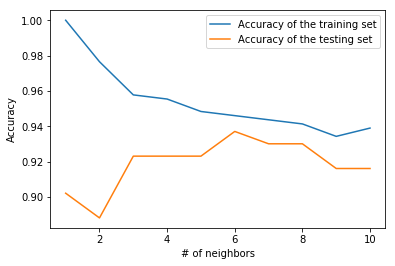

In [38]:
plt.plot(neighbors_settings, training_accuracy, label="Accuracy of the training set")
plt.plot(neighbors_settings, testing_accuracy, label="Accuracy of the testing set")
plt.ylabel("Accuracy")
plt.xlabel("# of neighbors")
plt.legend();